# Particulate Matter (PM) Prediction using Time Series

In [ ]:
# Installing pandas profiling for EDA
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 27.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5c652a9f4d5fbc1921747bd2f9bb2b8ff6a49e7aeeb04dd2e7d367108b85e82c
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from ydata_profiling import ProfileReport
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet

In [ ]:
df = pd.read_csv('/content/Copy of Final_ - Compiled.csv')
df.head()

YEAR  MO  DY  HR    T2M   RH2M  PRECTOTCORR  WS10M   WD10M   PM2.5    PM10
0  2018   1   1  19  11.71  35.44          0.0   2.55  346.56  249.25  313.25
1  2018   1   1  20  10.66  37.75          0.0   2.64  345.06  258.50  320.25
2  2018   1   1  21   9.40  40.81          0.0   2.81  345.50  224.25  274.50
3  2018   1   1  22   8.31  43.62          0.0   3.00  347.20  170.25  227.00
4  2018   1   1  23   7.47  45.88          0.0   3.09  349.06  147.25  204.00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52448 entries, 0 to 52447
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         52448 non-null  int64  
 1   MO           52448 non-null  int64  
 2   DY           52448 non-null  int64  
 3   HR           52448 non-null  int64  
 4   T2M          52448 non-null  float64
 5   RH2M         52448 non-null  float64
 6   PRECTOTCORR  52448 non-null  float64
 7   WS10M        52448 non-null  float64
 8   WD10M        52448 non-null  float64
 9   PM2.5        47985 non-null  float64
 10  PM10         44687 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.4 MB


In [ ]:
df['Date'] = pd.to_datetime(df[['YEAR', 'MO', 'DY', 'HR']].rename(columns={'YEAR':'year', 'MO':'month', 'DY':'day', 'HR':'hour'}))

In [ ]:
df.drop(['YEAR', 'MO', 'DY', 'HR'], axis=1, inplace=True)
df.head()

T2M   RH2M  PRECTOTCORR  WS10M   WD10M   PM2.5    PM10  \
0  11.71  35.44          0.0   2.55  346.56  249.25  313.25   
1  10.66  37.75          0.0   2.64  345.06  258.50  320.25   
2   9.40  40.81          0.0   2.81  345.50  224.25  274.50   
3   8.31  43.62          0.0   3.00  347.20  170.25  227.00   
4   7.47  45.88          0.0   3.09  349.06  147.25  204.00   

                 Date  
0 2018-01-01 19:00:00  
1 2018-01-01 20:00:00  
2 2018-01-01 21:00:00  
3 2018-01-01 22:00:00  
4 2018-01-01 23:00:00

In [ ]:
df.set_index('Date', inplace=True)
df.head()

T2M   RH2M  PRECTOTCORR  WS10M   WD10M   PM2.5    PM10
Date                                                                         
2018-01-01 19:00:00  11.71  35.44          0.0   2.55  346.56  249.25  313.25
2018-01-01 20:00:00  10.66  37.75          0.0   2.64  345.06  258.50  320.25
2018-01-01 21:00:00   9.40  40.81          0.0   2.81  345.50  224.25  274.50
2018-01-01 22:00:00   8.31  43.62          0.0   3.00  347.20  170.25  227.00
2018-01-01 23:00:00   7.47  45.88          0.0   3.09  349.06  147.25  204.00

In [ ]:
profile = ProfileReport(df, title='Time Series EDA')

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("profile.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

In [ ]:
df.isnull().sum()

T2M               0
RH2M              0
PRECTOTCORR       0
WS10M             0
WD10M             0
PM2.5          4463
PM10           7761
dtype: int64

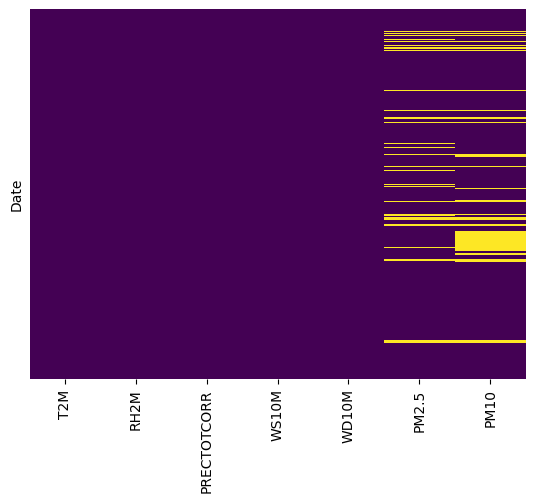

In [ ]:
# Heatmap for checking of null values (yellow - null values)
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [ ]:
df.shape

(52448, 7)

In [ ]:
# Dropping null values
df = df.dropna()
df.shape

(44161, 7)

In [ ]:
df.isnull().sum()

T2M            0
RH2M           0
PRECTOTCORR    0
WS10M          0
WD10M          0
PM2.5          0
PM10           0
dtype: int64

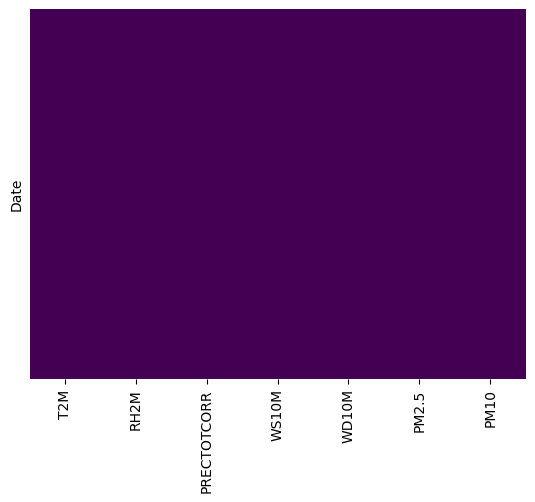

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

### Above figure represents there are no null values left

In [ ]:
df = df.asfreq('H')
df = df.fillna(method='ffill').fillna(method='bfill')

## Feature Selection

In [ ]:
X = df.iloc[:,:-2] # independent features
y = df.iloc[:,-2:] # dependent features

In [ ]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
print(model.feature_importances_)

[0.35056387 0.24971081 0.03475509 0.18196496 0.18300527]


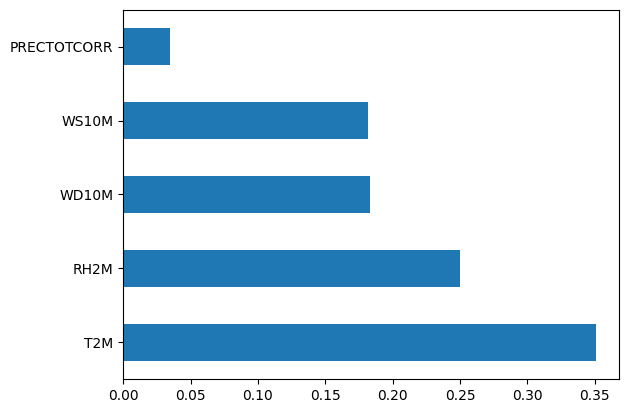

In [ ]:
# Top 5 most important features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh');

### Train Test Split

In [ ]:
series = df['PM2.5']
split_size = int(0.8 * len(series)) # 80% train, 20% test

# Models

# 1. Linear Regression

In [ ]:
features = ['T2M', 'RH2M', 'WS10M', 'WD10M', 'PRECTOTCORR']
target_pm25 = 'PM2.5'
target_pm10 = 'PM10'

In [ ]:
# Split data into features (X) and targets (y)
X = df[features]
y_pm25 = df[target_pm25]
y_pm10 = df[target_pm10]

# Split data into training and testing sets
X_train, X_test, y_pm25_train, y_pm25_test, y_pm10_train, y_pm10_test = train_test_split(X, y_pm25, y_pm10, test_size=0.2, shuffle=False)

In [ ]:
# Initialize the linear regression model
model_0 = LinearRegression()
model_0_1 = LinearRegression()

# Train the model
model_0.fit(X_train, y_pm25_train)
model_0_1.fit(X_train, y_pm10_train)

# Make predictions
predictions_pm25 = model_0.predict(X_test)
predictions_pm10 = model_0_1.predict(X_test)

PM2.5 - MAE: 56.25195622310296, MSE: 6762.086852867626, RMSE: 82.23190897010494, R²: 0.33883211147913006
PM10 - MAE: 76.70539399676345, MSE: 11341.339341476832, RMSE: 106.49572452205221, R²: 0.24189673339049766


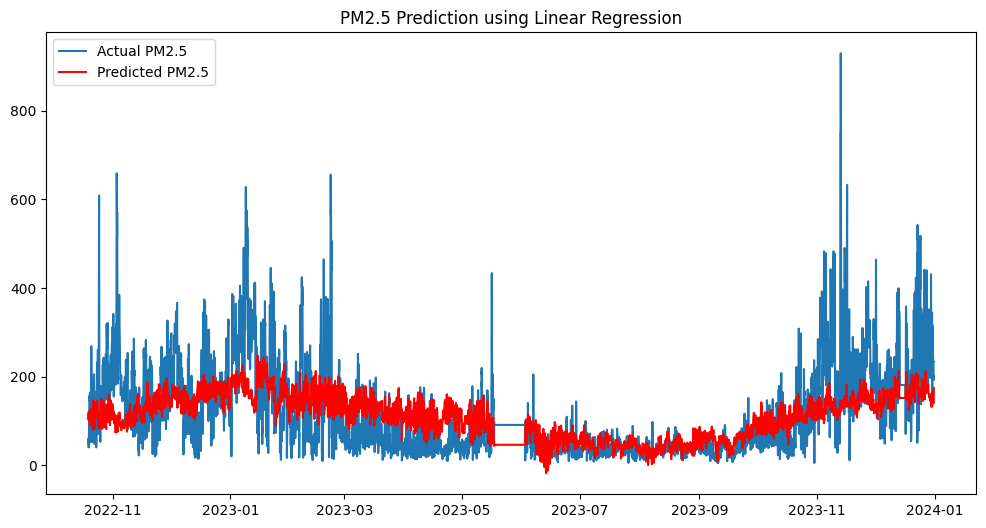

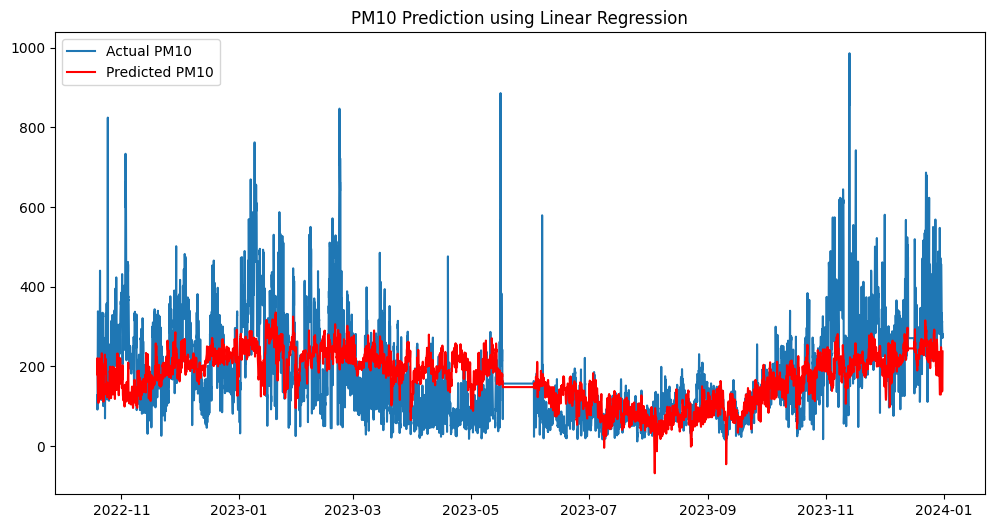

In [ ]:
# Calculate evaluation metrics for PM2.5
mae_0_pm25 = metrics.mean_absolute_error(y_pm25_test, predictions_pm25)
mse_0_pm25 = metrics.mean_squared_error(y_pm25_test, predictions_pm25)
rmse_0_pm25 = np.sqrt(mse_0_pm25)
rr_0_pm25 = metrics.r2_score(y_pm25_test, predictions_pm25)

print(f'PM2.5 - MAE: {mae_0_pm25}, MSE: {mse_0_pm25}, RMSE: {rmse_0_pm25}, R²: {rr_0_pm25}')

# Calculate evaluation metrics for PM10
mae_0_pm10 = metrics.mean_absolute_error(y_pm10_test, predictions_pm10)
mse_0_pm10 = metrics.mean_squared_error(y_pm10_test, predictions_pm10)
rmse_0_pm10 = np.sqrt(mse_0_pm10)
rr_0_pm10 = metrics.r2_score(y_pm10_test, predictions_pm10)

print(f'PM10 - MAE: {mae_0_pm10}, MSE: {mse_0_pm10}, RMSE: {rmse_0_pm10}, R²: {rr_0_pm10}')

# Plot the results for PM2.5
plt.figure(figsize=(12, 6))
plt.plot(y_pm25_test.index, y_pm25_test, label='Actual PM2.5')
plt.plot(y_pm25_test.index, predictions_pm25, label='Predicted PM2.5', color='red')
plt.legend()
plt.title('PM2.5 Prediction using Linear Regression')
plt.show()

# Plot the results for PM10
plt.figure(figsize=(12, 6))
plt.plot(y_pm10_test.index, y_pm10_test, label='Actual PM10')
plt.plot(y_pm10_test.index, predictions_pm10, label='Predicted PM10', color='red')
plt.legend()
plt.title('PM10 Prediction using Linear Regression');

# 2. ARIMAX (ARIMA with exogenous variables) - Using Arimax model as we have external factors which influence the target variable

In [ ]:
target = 'PM2.5'
exog_vars = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M']
exog = df[exog_vars]

In [ ]:
train, test = series[:split_size], series[split_size:]
exog_train, exog_test = exog[:split_size], exog[split_size:]

In [ ]:
model_1 = SARIMAX(train, exog=exog_train, order=(5, 1, 0))
model_1 = model_1.fit(disp=False)

In [ ]:
preds = model_1.forecast(steps=len(test), exog=exog_test)
preds = pd.Series(preds, index=test.index)

In [ ]:
mae = metrics.mean_absolute_error(test, preds)
print(f'Mean Absolute Error: {mae}')
mse = metrics.mean_squared_error(test, preds)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(metrics.mean_squared_error(test, preds))
print(f'Root Mean Squared Error: {rmse}')
rr = metrics.r2_score(test, preds)
print(f'R square: {rr}')

Mean Absolute Error: 59.9077090349891
Mean Squared Error: 7993.015270579063
Root Mean Squared Error: 89.40366474915368
R square: 0.21847720321386965


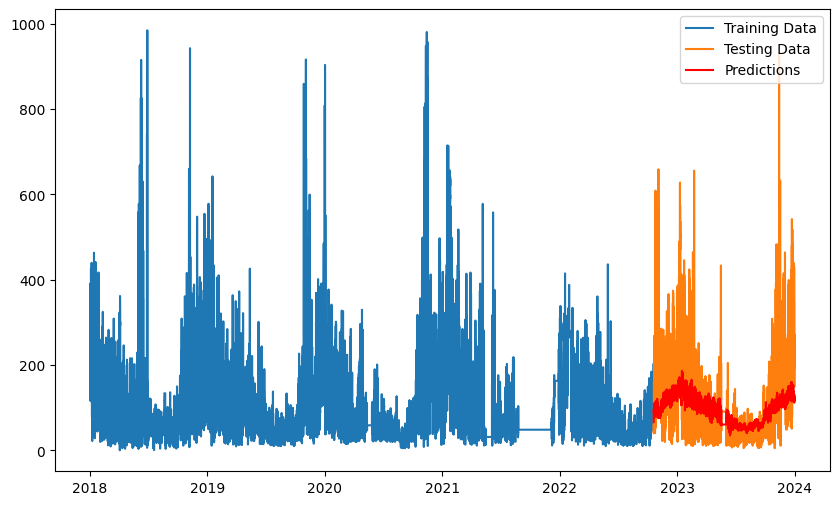

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Testing Data')
plt.plot(preds, label='Predictions', color='red')
plt.legend();

# 3. VAR (Vector AutoRegression)

In [ ]:
vars = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M', 'PM2.5', 'PM10']
data = df[vars]

In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
model_2 = VAR(train)
model_2 = model_2.fit(maxlags=15, ic='aic')

In [ ]:
lag_order = model_2.k_ar
predictions = model_2.forecast(train.values[-lag_order:], steps=len(test))
predictions_df = pd.DataFrame(predictions, index=test.index, columns=train.columns)

In [ ]:
mae_pm25 = metrics.mean_absolute_error(test['PM2.5'], predictions_df['PM2.5'])
mae_pm10 = metrics.mean_absolute_error(test['PM10'], predictions_df['PM10'])
mse_pm25 = metrics.mean_squared_error(test['PM2.5'], predictions_df['PM2.5'])
mse_pm10 = metrics.mean_squared_error(test['PM10'], predictions_df['PM10'])
rmse_pm25 = np.sqrt(metrics.mean_squared_error(test['PM2.5'], predictions_df['PM2.5']))
rmse_pm10 = np.sqrt(metrics.mean_squared_error(test['PM10'], predictions_df['PM10']))
rr_pm25 = metrics.r2_score(test['PM2.5'], predictions_df['PM2.5'])
rr_pm10 = metrics.r2_score(test['PM10'], predictions_df['PM10'])
print(f'Mean Absolute Error for PM2.5: {mae_pm25}')
print(f'Mean Absolute Error for PM10: {mae_pm25}')
print(f'Mean Squared Error for PM2.5: {mse_pm25}')
print(f'Mean Squared Error for PM10: {mse_pm10}')
print(f'Root Mean Squared Error for PM2.5: {rmse_pm25}')
print(f'Root Mean Squared Error for PM10: {rmse_pm10}')
print(f'R square for PM2.5: {rr_pm25}')
print(f'R square for PM10: {rr_pm10}')

Mean Absolute Error for PM2.5: 76.44165265749324
Mean Absolute Error for PM10: 76.44165265749324
Mean Squared Error for PM2.5: 10455.410807801622
Mean Squared Error for PM10: 15043.942094542963
Root Mean Squared Error for PM2.5: 102.25170320244852
Root Mean Squared Error for PM10: 122.65374879938632
R square for PM2.5: -0.02228528527121032
R square for PM10: -0.005600952512555324


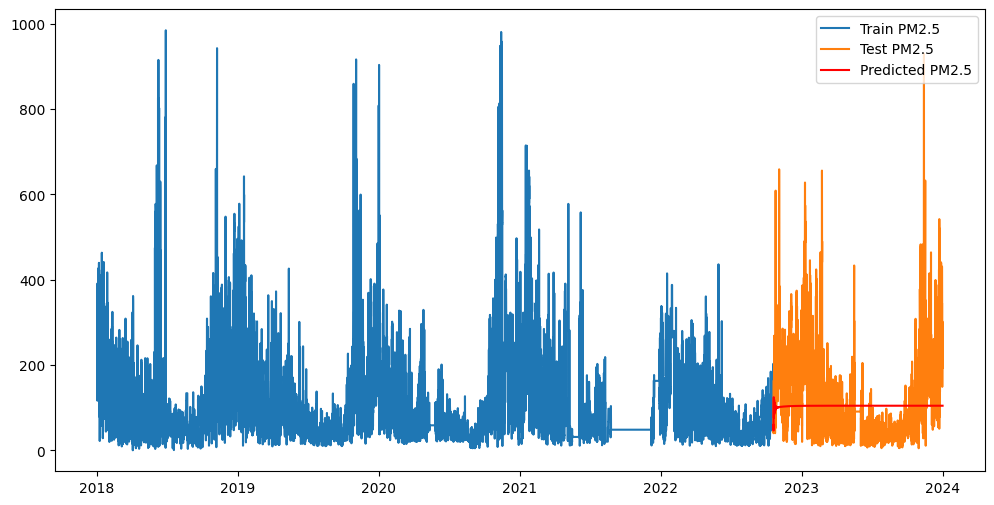

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['PM2.5'], label='Train PM2.5')
plt.plot(test['PM2.5'], label='Test PM2.5')
plt.plot(predictions_df['PM2.5'], label='Predicted PM2.5', color='red')
plt.legend();

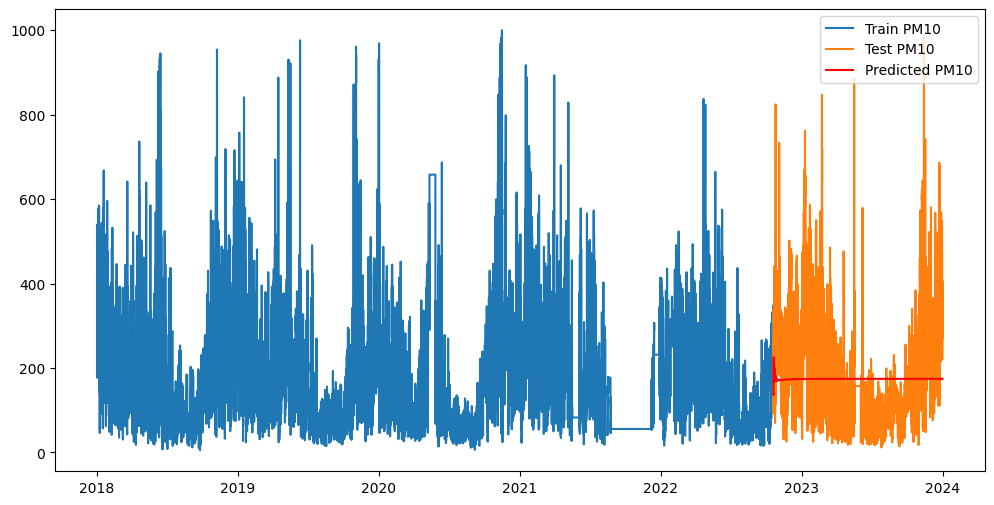

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train['PM10'], label='Train PM10')
plt.plot(test['PM10'], label='Test PM10')
plt.plot(predictions_df['PM10'], label='Predicted PM10', color='red')
plt.legend();

# 4. Random Forest

In [ ]:
targets = ['PM2.5', 'PM10']
features = ['T2M', 'RH2M', 'PRECTOTCORR', 'WS10M', 'WD10M']

In [ ]:
X = df[features]
y_pm25 = df['PM2.5']
y_pm10 = df['PM10']

In [ ]:
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X, y_pm25, test_size=0.2, shuffle=False)

In [ ]:
model_3 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3.fit(X_train_pm25, y_train_pm25)

RandomForestRegressor(random_state=42)

In [ ]:
predictions_pm25 = model_3.predict(X_test_pm25)

In [ ]:
mae_25 = metrics.mean_absolute_error(y_test_pm25, predictions_pm25)
print(f'Mean Absolute Error for PM2.5: {mae_pm25}')
mse_25 = metrics.mean_squared_error(y_test_pm25, predictions_pm25)
print(f'Mean Squared Error for PM2.5: {mse_pm25}')
rmse_25 = np.sqrt(metrics.mean_squared_error(y_test_pm25, predictions_pm25))
print(f'Root Mean Squared Error for PM2.5: {rmse_25}')
rr_25 = metrics.r2_score(y_test_pm25, predictions_pm25)
print(f'R square: {rr_25}')

Mean Absolute Error for PM2.5: 76.44165265749324
Mean Squared Error for PM2.5: 10455.410807801622
Root Mean Squared Error for PM2.5: 83.5951859088759
R square: 0.31672812589143173


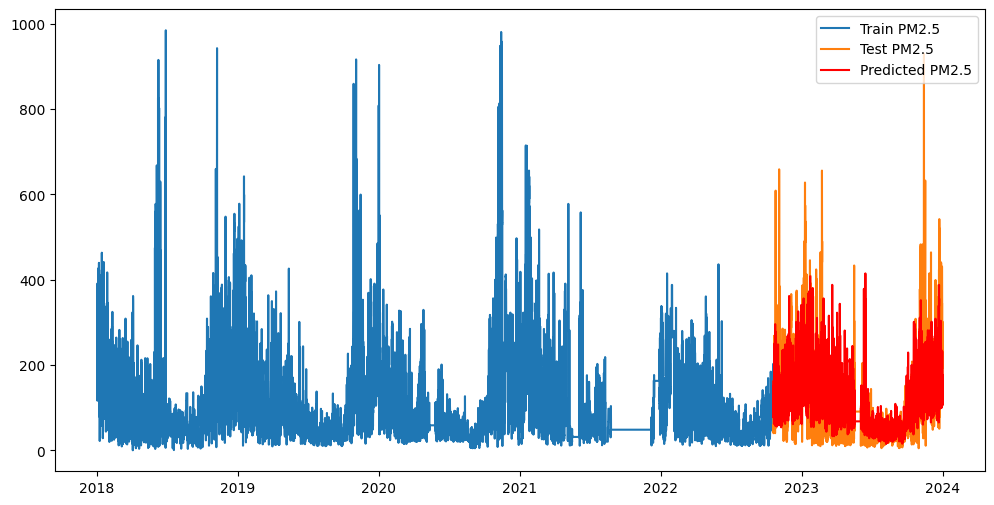

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_pm25.index, y_train_pm25, label='Train PM2.5')
plt.plot(y_test_pm25.index, y_test_pm25, label='Test PM2.5')
plt.plot(y_test_pm25.index, predictions_pm25, label='Predicted PM2.5', color='red')
plt.legend();

In [ ]:
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X, y_pm10, test_size=0.2, shuffle=False)

In [ ]:
model_3_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_3_1.fit(X_train_pm10, y_train_pm10)

RandomForestRegressor(random_state=42)

In [ ]:
predictions_pm10 = model_3_1.predict(X_test_pm10)

In [ ]:
mae_10 = metrics.mean_absolute_error(y_test_pm10, predictions_pm10)
print(f'Mean Absolute Error for PM10: {mae_pm10}')
mse_10 = metrics.mean_squared_error(y_test_pm10, predictions_pm10)
print(f'Mean Squared Error for PM10: {mse_pm10}')
rmse_10 = np.sqrt(metrics.mean_squared_error(y_test_pm10, predictions_pm10))
print(f'Root Mean Squared Error for PM10: {rmse_10}')
rr_10 = metrics.r2_score(y_test_pm10, predictions_pm10)
print(f'R square: {rr_10}')

Mean Absolute Error for PM10: 93.63355591005718
Mean Squared Error for PM10: 15043.942094542963
Root Mean Squared Error for PM10: 105.8195694027526
R square: 0.2514927643998359


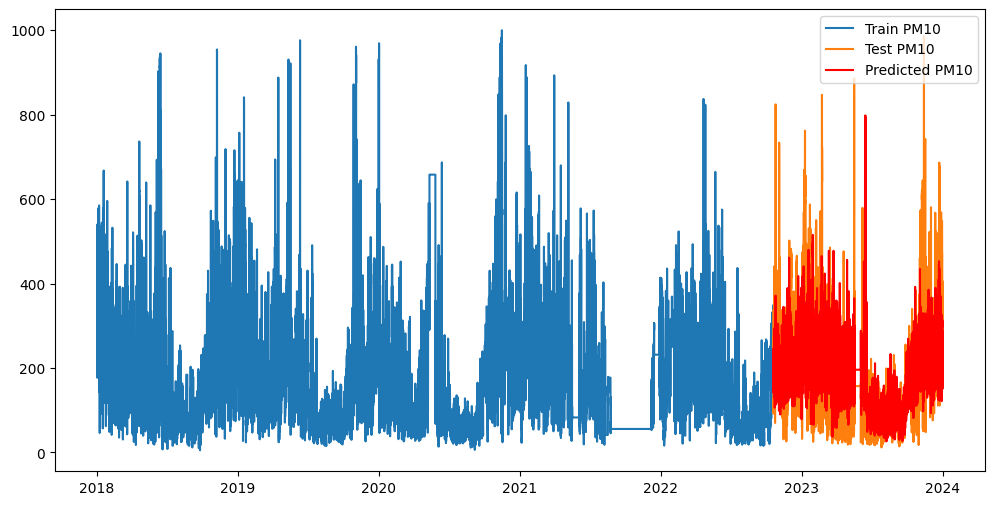

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_pm10.index, y_train_pm10, label='Train PM10')
plt.plot(y_test_pm10.index, y_test_pm10, label='Test PM10')
plt.plot(y_test_pm10.index, predictions_pm10, label='Predicted PM10', color='red')
plt.legend();

# 5. LSTM

In [ ]:
features = ['T2M', 'RH2M', 'WS10M', 'WD10M', 'PRECTOTCORR']
target = ['PM2.5', 'PM10']
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

model_4 = Sequential()
model_4.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_4.add(LSTM(50, return_sequences=False))
model_4.add(Dense(25))
model_4.add(Dense(len(target)))

# Compile the model
model_4.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_4.fit(X_train, y_train, batch_size=1, epochs=1)

42040/42040 [==============================] - 221s 5ms/step - loss: 10924.3789


In [ ]:
# Make predictions on the test data
predictions = model_4.predict(X_test)

329/329 [==============================] - 3s 4ms/step


Mean Absolute Error for PM2.5: 14.004455200529724
Mean Absolute Error for PM10: 19.184895809200317
Mean Squared Error for PM2.5: 589.6852267161277
Mean Squared Error for PM10: 1035.8732655439971
Root Mean Squared Error for PM2.5: 24.283435233016924
Root Mean Squared Error for PM10: 32.18498509466794
Mean Absolute Error for PM2.5: 589.6852267161277
Mean Absolute Error for PM10: 1035.8732655439971
R square for PM2.5: 0.9423580090986077
R square for PM10: 0.930778526792308


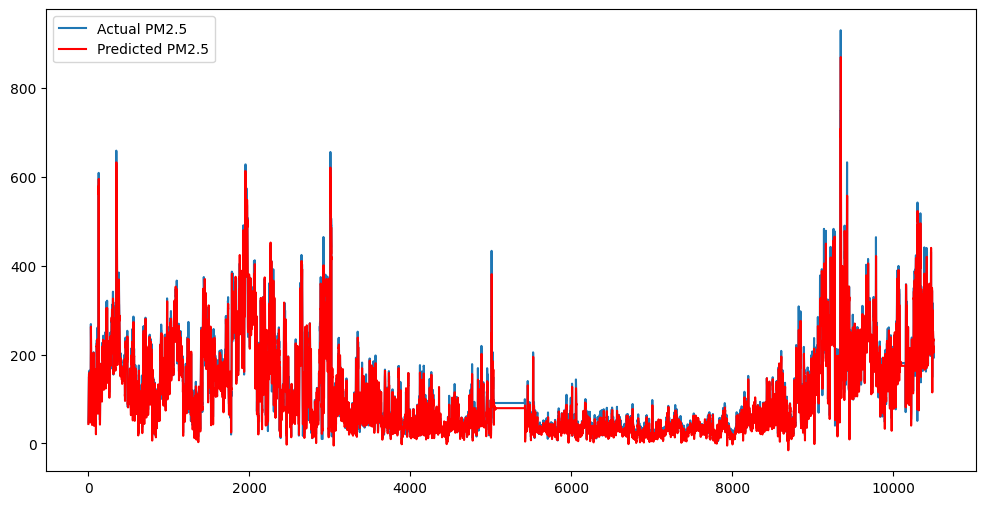

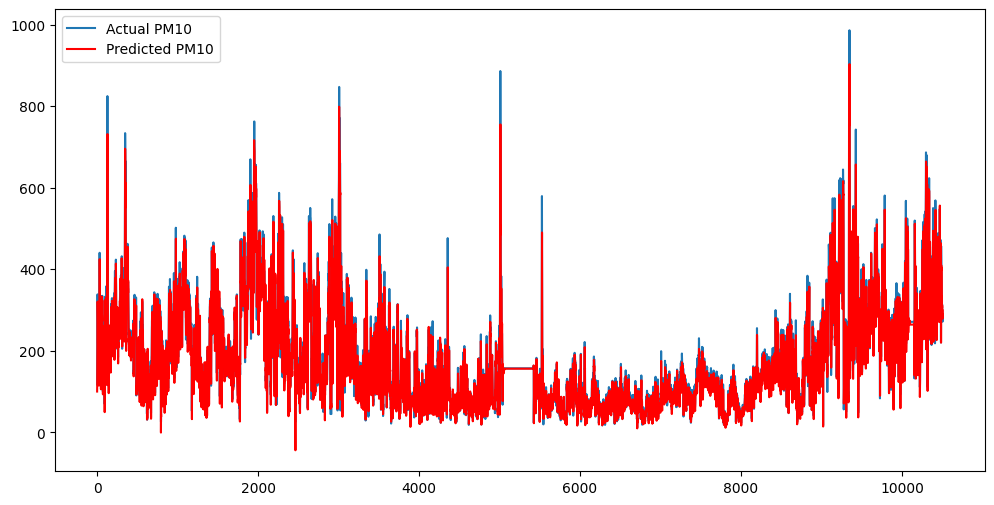

In [ ]:
# Evaluate the model
mae_4_pm25 = metrics.mean_absolute_error(y_test_inv[:, 0], predictions_inv[:, 0])
mae_4_pm10 = metrics.mean_absolute_error(y_test_inv[:, 1], predictions_inv[:, 1])
mse_4_pm25 = metrics.mean_squared_error(y_test_inv[:, 0], predictions_inv[:, 0])
mse_4_pm10 = metrics.mean_squared_error(y_test_inv[:, 1], predictions_inv[:, 1])
rmse_4_pm25 = np.sqrt(metrics.mean_squared_error(y_test_inv[:, 0], predictions_inv[:, 0]))
rmse_4_pm10 = np.sqrt(metrics.mean_squared_error(y_test_inv[:, 1], predictions_inv[:, 1]))
mae_4_pm25 = metrics.mean_absolute_error(y_test_inv[:, 0], predictions_inv[:, 0])
mae_4_pm10 = metrics.mean_absolute_error(y_test_inv[:, 1], predictions_inv[:, 1])
rr_4_pm25 = metrics.r2_score(y_test_inv[:, 0], predictions_inv[:, 0])
rr_4_pm10 = metrics.r2_score(y_test_inv[:, 1], predictions_inv[:, 1])
print(f'Mean Absolute Error for PM2.5: {mae_4_pm25}')
print(f'Mean Absolute Error for PM10: {mae_4_pm10}')
print(f'Mean Squared Error for PM2.5: {mse_4_pm25}')
print(f'Mean Squared Error for PM10: {mse_4_pm10}')
print(f'Root Mean Squared Error for PM2.5: {rmse_4_pm25}')
print(f'Root Mean Squared Error for PM10: {rmse_4_pm10}')
print(f'Mean Absolute Error for PM2.5: {mse_4_pm25}')
print(f'Mean Absolute Error for PM10: {mse_4_pm10}')
print(f'R square for PM2.5: {rr_4_pm25}')
print(f'R square for PM10: {rr_4_pm10}')

# Plot the results for PM2.5
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 0], label='Actual PM2.5')
plt.plot(predictions_inv[:, 0], label='Predicted PM2.5', color='red')
plt.legend();

# Plot the results for PM10
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 1], label='Actual PM10')
plt.plot(predictions_inv[:, 1], label='Predicted PM10', color='red')
plt.legend();

In [ ]:
# Saving the model
save_model(model_4, 'lstm_model.h5')

<ipython-input-15-77cd4a03a86f>:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model_4, 'lstm_model.h5')


# 6. FB Prophet

In [ ]:
# Select the target variables
pm25_df = df[['PM2.5']].reset_index().rename(columns={'Date': 'ds', 'PM2.5': 'y'})
pm10_df = df[['PM10']].reset_index().rename(columns={'Date': 'ds', 'PM10': 'y'})

In [ ]:
# Split the data into training and testing sets
train_size = int(len(pm25_df) * 0.8)
pm25_train, pm25_test = pm25_df[:train_size], pm25_df[train_size:]
pm10_train, pm10_test = pm10_df[:train_size], pm10_df[train_size:]

In [ ]:
# Train the Prophet model for PM2.5
model_5 = Prophet()
model_5.fit(pm25_train)

# Train the Prophet model for PM10
model_5_1 = Prophet()
model_5_1.fit(pm10_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpis7ni6oh/n38j8cr5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpis7ni6oh/xny396am.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12452', 'data', 'file=/tmp/tmpis7ni6oh/n38j8cr5.json', 'init=/tmp/tmpis7ni6oh/xny396am.json', 'output', 'file=/tmp/tmpis7ni6oh/prophet_modele69igics/prophet_model-20240610173537.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:35:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:36:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpis7ni6oh/ddsb2y73.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpis7ni6oh/gt0uw5g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
# Make predictions for PM2.5
pm25_future = model_5.make_future_dataframe(periods=len(pm25_test), freq='H')
pm25_forecast = model_5.predict(pm25_future)

# Make predictions for PM10
pm10_future = model_5_1.make_future_dataframe(periods=len(pm10_test), freq='H')
pm10_forecast = model_5_1.predict(pm10_future)

# Extract the predictions for the test period
pm25_predictions = pm25_forecast.iloc[-len(pm25_test):]['yhat'].values
pm10_predictions = pm10_forecast.iloc[-len(pm10_test):]['yhat'].values

# Evaluate PM2.5 predictions
mae_5_pm25 = metrics.mean_absolute_error(pm25_test['y'], pm25_predictions)
mse_5_pm25 = metrics.mean_squared_error(pm25_test['y'], pm25_predictions)
rmse_5_pm25 = np.sqrt(mse_pm25)
rr_5_pm25 = metrics.r2_score(pm25_test['y'], pm25_predictions)

# Evaluate PM10 predictions
mae_5_pm10 = metrics.mean_absolute_error(pm10_test['y'], pm10_predictions)
mse_5_pm10 = metrics.mean_squared_error(pm10_test['y'], pm10_predictions)
rmse_5_pm10 = np.sqrt(mse_pm10)
rr_5_pm10 = metrics.r2_score(pm10_test['y'], pm10_predictions)

print(f'PM2.5 - MAE: {mae_5_pm25}, MSE: {mse_5_pm25}, RMSE: {rmse_5_pm25}, R2: {rr_5_pm25}')
print(f'PM10 - MAE: {mae_5_pm10}, MSE: {mse_5_pm10}, RMSE: {rmse_5_pm10}, R2: {rr_5_pm10}')

PM2.5 - MAE: 148.65840644389223, MSE: 26081.5092980748, RMSE: 102.25170320244852, R2: -1.550138264599886
PM10 - MAE: 197.0128592559236, MSE: 47754.77001744195, RMSE: 122.65374879938632, R2: -2.192131551342332


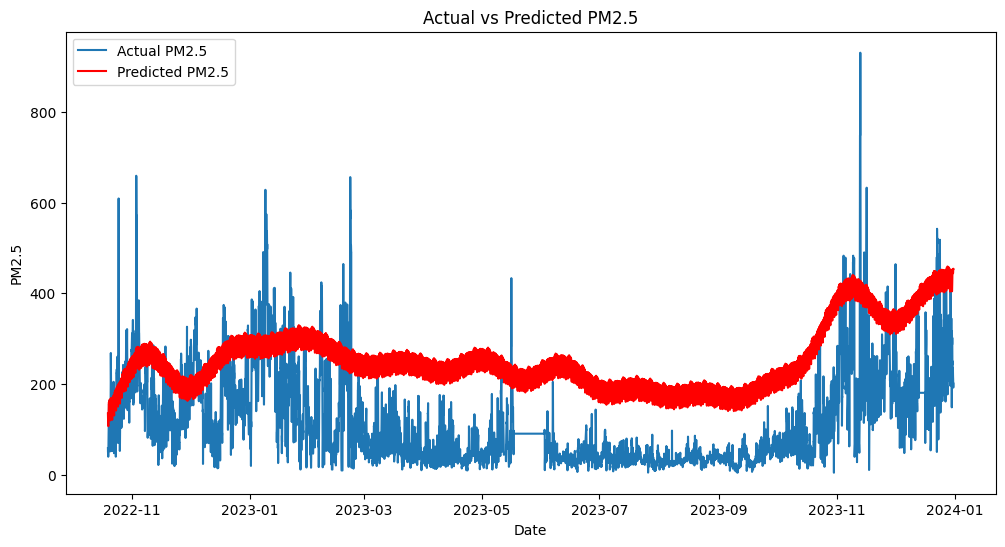

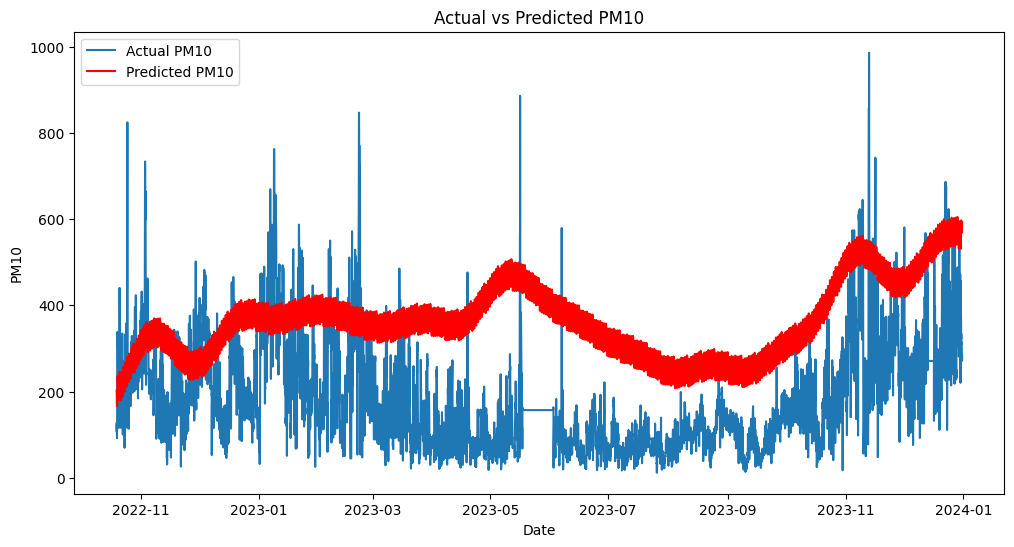

In [ ]:
# Plot the results for PM2.5
plt.figure(figsize=(12, 6))
plt.plot(pm25_test['ds'], pm25_test['y'], label='Actual PM2.5')
plt.plot(pm25_test['ds'], pm25_predictions, label='Predicted PM2.5', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5');

# Plot the results for PM10
plt.figure(figsize=(12, 6))
plt.plot(pm10_test['ds'], pm10_test['y'], label='Actual PM10')
plt.plot(pm10_test['ds'], pm10_predictions, label='Predicted PM10', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10');

## Storing results in a single dataframe

In [ ]:
evaluation_data_pm25 = {
    'Model': ['Linear Regression', 'ARIMAX', 'VAR', 'Random Forest', 'LSTM', 'FB Prophet'],
    'MAE': [mae_0_pm25, mae, mae_pm25, mae_25, mae_4_pm25, mae_5_pm10],
    'MSE': [mse_0_pm25, mse, mse_pm25, mse_25, mse_4_pm25, mse_5_pm10],
    'RMSE': [rmse_0_pm25, rmse, rmse_pm25, rmse_25, rmse_4_pm25, rmse_5_pm10],
    'R2': [rr_0_pm25, rr, rr_pm25, rr_25, rr_4_pm25, rr_5_pm10]
}
evaluation_df_pm25 = pd.DataFrame(evaluation_data_pm25)
print(evaluation_df_pm25)

               Model         MAE           MSE        RMSE        R2
0  Linear Regression   56.251956   6762.086853   82.231909  0.338832
1             ARIMAX   59.907709   7993.015271   89.403665  0.218477
2                VAR   76.441653  10455.410808  102.251703 -0.022285
3      Random Forest   55.932344   6988.155107   83.595186  0.316728
4               LSTM   14.004455    589.685227   24.283435  0.942358
5         FB Prophet  197.012859  47754.770017  122.653749 -2.192132


In [ ]:
evaluation_data_pm10 = {
    'Model': ['Linear Regression', 'ARIMAX', 'VAR', 'Random Forest', 'LSTM', 'FB Prophet'],
    'MAE': [mae_0_pm10, mae, mae_pm10, mae_10, mae_4_pm10, mae_5_pm10],
    'MSE': [mse_0_pm10, mse, mse_pm10, mse_10, mse_4_pm10, mse_5_pm10],
    'RMSE': [rmse_0_pm10, rmse, rmse_pm10, rmse_10, rmse_4_pm10, rmse_5_pm10],
    'R2': [rr_0_pm10, rr, rr_pm10, rr_10, rr_4_pm10, rr_5_pm10]
}
evaluation_df_pm10 = pd.DataFrame(evaluation_data_pm10)
print(evaluation_df_pm10)

               Model         MAE           MSE        RMSE        R2
0  Linear Regression   76.705394  11341.339341  106.495725  0.241897
1             ARIMAX   59.907709   7993.015271   89.403665  0.218477
2                VAR   93.633556  15043.942095  122.653749 -0.005601
3      Random Forest   74.350592  11197.781269  105.819569  0.251493
4               LSTM   19.184896   1035.873266   32.184985  0.930779
5         FB Prophet  197.012859  47754.770017  122.653749 -2.192132


## LSTM is the best model we got as MAE, MSE, RMSE are low and R2 value is high.